<a href="https://colab.research.google.com/github/NU-OsburnLab/Example_Scripts/blob/main/Surface_Lipids_Bubbleplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

FATTY ACID METHYL ESTERS

In [ ]:
url1 = 'https://raw.githubusercontent.com/FloydNichols97/BC_Surface_Dataset/main/2019_Surface_F4_Weight_Normalized.csv'
Surface_2019_F4 = pd.read_csv(url1)
Surface_2019_F4 = Surface_2019_F4.drop(columns=['RT'])

ALKANES

In [ ]:
url2 = 'https://raw.githubusercontent.com/FloydNichols97/BC_Surface_Dataset/main/Surface_Alkanes_Normalized_Weight.csv'
Surface_Alkanes_F4 = pd.read_csv(url2)

Ether Lipids

In [ ]:
url3 = 'https://raw.githubusercontent.com/FloydNichols97/BC_Surface_Dataset/main/2019_Surface_Ether_Normalized.csv' 
Surface_Ether = pd.read_csv(url3)
Surface_Ether = Surface_Ether.drop(columns=['RT'])

MERGE DATAFRAMES

In [ ]:
Merged_df = pd.merge(Surface_2019_F4, Surface_Alkanes_F4, how = 'outer')
Merged_df = pd.merge(Merged_df, Surface_Ether, how = 'outer')
Merged_df = Merged_df.fillna(0)
Merged_df = Merged_df.drop(columns=['Compound', 'SLP_Sediment', 'SLSU_Spring', 'SLSL_Spring', 'SLSU_Sediment'])
Merged_df = Merged_df.loc[(Merged_df['Category'] != 'PAIBE') & 
                    (Merged_df['Category'] != 'Unknown') & 
                    (Merged_df['Category'] != 'FAME') & 
                    (Merged_df['Category'] != 'Ester') & 
                    (Merged_df['Category'] != 'Alkane') & 
                    (Merged_df['Category'] != 'Aromatic') & 
                    (Merged_df['Category'] != 'PAH') & 
                    (Merged_df['Category'] != 'Unkown')]
Merged_df = Merged_df.reindex(columns = ['Category', 'BL1-1_Sediment', 'LCL5_Brine', 'BL1-1_Salt', 'SL_Salt_2', 'LCL4_Brine', 'BL2-23_Brine', 'BL4_Salt', 'SL_Sediment_3', 'LCL5_Mat', 'BL2-1_Brine', 'LCL5_Sediment', 'BL1-1_Salt_1', 'BL2-4_Brine', 'LCL4_Sediment', 'BL1-2_Brine', 'BL1-1_Salt_2', 'BL4_Brine', 'BL2-2_Brine', 'BL1-1_Mat', 'BL2-23_Sediment', 'LCL4_Mat', 'SL_Sediment_1', 'BL2-23_Salt', 'BL1-2_Mat_Top', 'BL1-2_Mat_Bottom', 'BL2-11_Streamers', 'BL_Sediment_3', 'BL4_Sediment', 'BL2-23_Mat'])
display(Merged_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Category,BL1-1_Sediment,LCL5_Brine,BL1-1_Salt,SL_Salt_2,LCL4_Brine,BL2-23_Brine,BL4_Salt,SL_Sediment_3,LCL5_Mat,...,BL2-23_Sediment,LCL4_Mat,SL_Sediment_1,BL2-23_Salt,BL1-2_Mat_Top,BL1-2_Mat_Bottom,BL2-11_Streamers,BL_Sediment_3,BL4_Sediment,BL2-23_Mat
0,Oxo,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.452795,...,0.0,1.032341,0.0,0.000000,3.130862,1.326782,0.0,0.0,0.000000,3.374300
1,Short_Saturated,0.0,0.0,0.260706,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.143106,0.000000,0.000000,0.0,0.0,0.708598,0.000000
2,Diacid,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,8.335210,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,Diacid,0.0,0.0,0.170923,0.0,0.000000,0.0,0.0,0.454702,2.457734,...,0.0,0.000000,0.0,0.000000,8.335667,7.669566,0.0,0.0,1.084709,5.879395
4,Branched,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.361374,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.452177,2.569641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Non-Isoprenoid,0.0,0.0,0.000000,0.0,0.097418,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
246,Isoprenoid,0.0,0.0,0.000000,0.0,0.265547,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
247,Isoprenoid,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
248,Isoprenoid,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Convert data frame to long format

In [ ]:
# Convert to long format 
Merged_df_long = pd.melt(Merged_df, id_vars = 'Category', var_name = 'Sample', value_name = 'Quantification')

# Load in TLE and Sample Type Data
url3 = 'https://raw.githubusercontent.com/FloydNichols97/BC_Surface_Dataset/main/Surface_TLE.csv'
Surface_TLE = pd.read_csv(url3)
Merged_df_long = pd.merge(Merged_df_long, Surface_TLE, on = 'Sample', how = 'left')

# Group by Compound Category 
Merged_df_long = Merged_df_long.groupby(['Category', 'Sample'], sort = False).sum()
Merged_df_long['log_Quantification'] = np.log(Merged_df_long['Quantification'] + 1)
display(Merged_df_long)

,,Quantification,TLE,log_Quantification
Category,Sample,,,
Oxo,BL1-1_Sediment,0.000000,0.0,0.000000
Short_Saturated,BL1-1_Sediment,38.029682,0.0,3.664322
Diacid,BL1-1_Sediment,0.000000,0.0,0.000000
Branched,BL1-1_Sediment,15.310396,0.0,2.791803
Dimethoxy,BL1-1_Sediment,0.000000,0.0,0.000000
...,...,...,...,...
Isoprenoid_Alkane,BL2-23_Mat,0.000000,258.3,0.000000
Polycyclic_Alkane,BL2-23_Mat,0.000000,28.7,0.000000
Long_Saturated_Alkane,BL2-23_Mat,1.580508,430.5,0.947986


Multiplot

{'icoord': [[15.0, 15.0, 25.0, 25.0], [55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [35.0, 35.0, 52.5, 52.5], [20.0, 20.0, 43.75, 43.75], [5.0, 5.0, 31.875, 31.875], [75.0, 75.0, 85.0, 85.0], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [132.5, 132.5, 162.5, 162.5], [102.5, 102.5, 147.5, 147.5], [80.0, 80.0, 125.0, 125.0], [18.4375, 18.4375, 102.5, 102.5], [195.0, 195.0, 205.0, 205.0], [185.0, 185.0, 200.0, 200.0], [215.0, 215.0, 225.0, 225.0], [235.0, 235.0, 245.0, 245.0], [220.0, 220.0, 240.0, 240.0], [192.5, 192.5, 230.0, 230.0], [275.0, 275.0, 285.0, 285.0], [265.0, 265.0, 280.0, 280.0], [255.0, 255.0, 272.5, 272.5], [211.25, 211.25, 263.75, 263.75], [60.46875, 60.46875, 237.5, 237.5]], 'dcoord': [[0.0, 69.10278910057848, 69.10278910057848, 0.0], [0.0, 9.158167066543324, 9.158167066543324, 0.0], [0.0, 67.29780918288698, 67.29780918288698, 9.1581

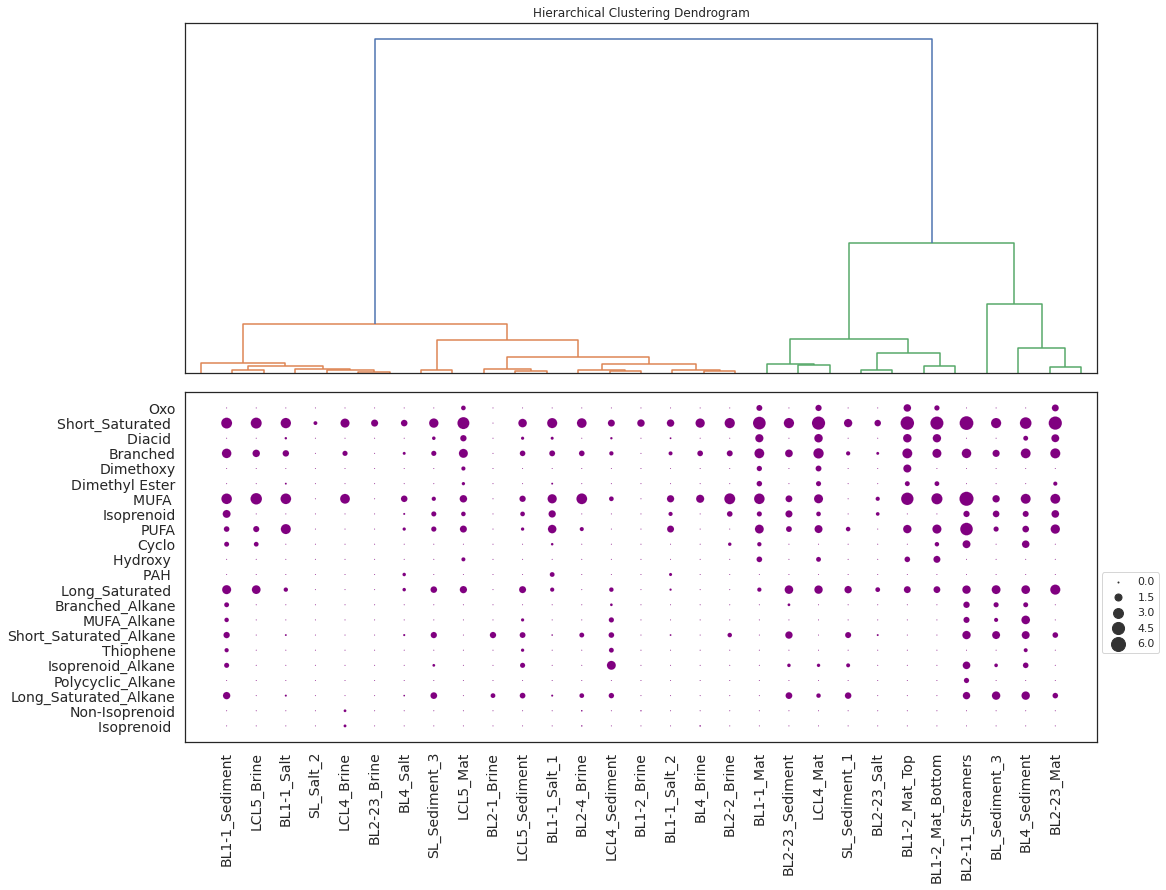

In [ ]:
# Overall figure dimension
plt.figure(figsize=(16,12))

# Plot bubbleplot in second subplot
plt.subplot(2,1,2)
sns.set_theme(style = "whitegrid")
sns.scatterplot(data = Merged_df_long, x = 'Sample', y = 'Category', size = 'log_Quantification', sizes = (1,200), color = 'purple')
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(labelsize=14)
plt.legend(bbox_to_anchor=(1.0, 0.5), loc='upper left')

# Reorder data frame to have one index of Sample names 
Merged_df_long = Merged_df_long.groupby(['Sample']).sum()
Merged_df_cluster = linkage(Merged_df_long, 'ward') 

# Plot dendrogram in first subplot 
sns.set_theme(style = "white")
plt.subplot(2,1,1)
plt.tight_layout(pad=0)
plt.title('Hierarchical Clustering Dendrogram')
ax = ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
d = dendrogram(Merged_df_cluster, labels = Merged_df_long.index,leaf_rotation = 90) 
print(d)

# Save Figure
plt.savefig("Bubbleplot_HC.pdf", format="pdf", bbox_inches="tight")

In [ ]:
# Reorder data frame to have one index of Sample names 
Merged_df_long = Merged_df_long.groupby(['Sample']).sum()
print(Merged_df_long)

                   Quantification     TLE  log_Quantification
Sample                                                       
BL2-11_Streamers       182.157771  3356.0           19.749573
BL1-2_Mat_Top           40.226780  1488.8            9.724469
BL1-1_Mat               35.704632  1700.8            9.608439
BL2-23_Mat              47.447051  2296.0           11.519754
BL1-2_Mat_Bottom         0.000000     0.0            0.000000
LCL4_Mat                40.122602  1844.0            9.927490
SL_Salt_2                0.000000    72.0            0.000000
BL1-1_Salt               0.000000     0.0            0.000000
BL1-1_Salt_2             4.796905   236.8            2.556802
BL2-23_Salt              0.870927  1405.6            0.740524
BL1-1_Sediment          34.499334     0.0           11.992352
SLSL_Spring              0.000000     0.0            0.000000
BL1-2_Brine              0.000000     0.0            0.000000
BL2-1_Brine              3.377848   492.0            1.909036
BL2-23_B